In [2]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score


In [3]:
df=pd.read_csv('bank-full.csv',sep=';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
# df.columns: returns all the column names

In [5]:
# Data cleaning

# s stores all value_counts
# value_counts() counts unique objects
s=[]
for i in df.columns:
    s.append(df[str(i)].value_counts())


In [8]:
# Transform string to number 

# s[1].index is an object and should be transformed to list
s_index1=list(s[1].index)
# Find the object that equals to one in s[].index in every column, then replace the value with the index of it in s list.
for i in s[1].index:
    df.loc[df[str(df.columns[1])]==str(i),str(df.columns[1])]=s_index1.index(str(i))
    
s_index2=list(s[2].index)
for i in s[2].index:
    df.loc[df[str(df.columns[2])]==str(i),str(df.columns[2])]=s_index2.index(str(i))
    
s_index3=list(s[3].index)
for i in s[3].index:
    df.loc[df[str(df.columns[3])]==str(i),str(df.columns[3])]=s_index3.index(str(i))
    
s_index4=list(s[4].index)
for i in s[4].index:
    df.loc[df[str(df.columns[4])]==str(i),str(df.columns[4])]=s_index4.index(str(i))
    
s_index6=list(s[6].index)
for i in s[6].index:
    df.loc[df[str(df.columns[6])]==str(i),str(df.columns[6])]=s_index6.index(str(i))
    
s_index7=list(s[7].index)
for i in s[7].index:
    df.loc[df[str(df.columns[7])]==str(i),str(df.columns[7])]=s_index7.index(str(i))
    
s_index8=list(s[8].index)
for i in s[8].index:
    df.loc[df[str(df.columns[8])]==str(i),str(df.columns[8])]=s_index8.index(str(i))
    
s_index10=list(s[10].index)
for i in s[10].index:
    df.loc[df[str(df.columns[10])]==str(i),str(df.columns[10])]=s_index10.index(str(i))
    
s_index15=list(s[15].index)
for i in s[15].index:
    df.loc[df[str(df.columns[15])]==str(i),str(df.columns[15])]=s_index15.index(str(i))
    
s_index16=list(s[16].index)
for i in s[16].index:
    df.loc[df[str(df.columns[16])]==str(i),str(df.columns[16])]=s_index16.index(str(i))


In [9]:
# drop NA, Keep rows with at least 17 Non-Null values
df=df.dropna(thresh=17)
# fill NA
df=df.fillna(method='ffill',limit=3)
df.apply(lambda x:((x-x.mean())/x.var()))

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.151331,-0.238980,-1.068850,0.372229,-1.018335,0.000084,-1.799045,-1.190771,1.570163,-0.156019,-0.390517,0.000043,-0.183777,-0.004109,-0.109374,-0.594561,-1.132458
1,0.027171,-0.098488,1.013713,-0.959482,-1.018335,-0.000144,-1.799045,-1.190771,1.570163,-0.156019,-0.390517,-0.001616,-0.183777,-0.004109,-0.109374,-0.594561,-1.132458
2,-0.070383,0.603972,-1.068850,-0.959482,-1.018335,-0.000147,-1.799045,6.241027,1.570163,-0.156019,-0.390517,-0.002747,-0.183777,-0.004109,-0.109374,-0.594561,-1.132458
3,0.053777,-0.379472,-1.068850,3.035650,-1.018335,0.000016,-1.799045,-1.190771,1.570163,-0.156019,-0.390517,-0.002505,-0.183777,-0.004109,-0.109374,-0.594561,-1.132458
4,-0.070383,1.165940,1.013713,3.035650,-1.018335,-0.000147,2.251382,-1.190771,1.570163,-0.156019,-0.390517,-0.000907,-0.183777,-0.004109,-0.109374,-0.594561,-1.132458
5,-0.052646,-0.238980,-1.068850,0.372229,-1.018335,-0.000122,-1.799045,-1.190771,1.570163,-0.156019,-0.390517,-0.001797,-0.183777,-0.004109,-0.109374,-0.594561,-1.132458
6,-0.114725,-0.238980,1.013713,0.372229,-1.018335,-0.000099,-1.799045,6.241027,1.570163,-0.156019,-0.390517,-0.000621,-0.183777,-0.004109,-0.109374,-0.594561,-1.132458
7,0.009434,0.603972,3.096276,0.372229,55.472393,-0.000147,-1.799045,-1.190771,1.570163,-0.156019,-0.390517,0.001837,-0.183777,-0.004109,-0.109374,-0.594561,-1.132458
8,0.151331,0.322988,-1.068850,1.703939,-1.018335,-0.000134,-1.799045,-1.190771,1.570163,-0.156019,-0.390517,-0.003139,-0.183777,-0.004109,-0.109374,-0.594561,-1.132458
9,0.018303,-0.098488,1.013713,-0.959482,-1.018335,-0.000083,-1.799045,-1.190771,1.570163,-0.156019,-0.390517,-0.003063,-0.183777,-0.004109,-0.109374,-0.594561,-1.132458


In [10]:
# select X and y from dataframe
X=df.iloc[:,0:16]
# if y=df.iloc[:,16：17], we get a dataframe，otherwise we get a series. Here is a series object
y=df.iloc[:,16]
# 25% as training data for default， use 'test_size' argument to give a percentage to split
X_train,X_test,y_train,y_test=train_test_split(X,y)

#################################################### logistic regression ####################################################

In [11]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
pred_log=log_reg.predict(X_test)
# Use 'predict_proba' to get AUC, return the probability in every classification (if it is dichotomy, there are two columns)
pred_proba_log=log_reg.predict_proba(X_test)

print("Logistic classification results:")
# accuracy_score reflects the ratio of correct positive to predicted positive
print("accuracy_score:",accuracy_score(y_test,pred_log))
# precision_score reflects the prediction precision 
print("precision_score:",precision_score(y_test,pred_log))
# recall_score reflects the ratio of correct positive to true positive
print("recall_score",recall_score(y_test,pred_log))
print("auc:",roc_auc_score(y_test,pred_proba_log[:,1]))
print("f1_score(weighted):",f1_score(y_test,pred_log,average='weighted'))
print("f1_score(macro):",f1_score(y_test,pred_log,average='macro'))
print("f1_score(micro):",f1_score(y_test,pred_log,average='micro'))
print("f1_score(None):",f1_score(y_test,pred_log))

C:\Users\dizhe\Anaconda3\envs\mcm\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic classification results:
accuracy_score: 0.8971069627532513
precision_score: 0.6228748068006182
recall_score 0.3048411497730711
auc: 0.8887919573665001
f1_score(weighted): 0.8811531211378714
f1_score(macro): 0.6764948773636862
f1_score(micro): 0.8971069627532513
f1_score(None): 0.409344845099035


####################################################  svm ####################################################

In [13]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# method without pipeline 
# scaler=StandardScaler()
# scaler.fit(df)
# svm_clf=SVC(C=1,probability=True,verbose=1)

# standardize by column
svm_clf=Pipeline((
        ('scaler',StandardScaler()),
        ('linear_svc',LinearSVC(C=1,loss='hinge'))
        ))
svm_clf.fit(X_train,y_train)
pred_svm=svm_clf.predict(X_test)

print("svm classification result")
print("accuracy_score:",accuracy_score(y_test,pred_svm))
print("precision_score:",precision_score(y_test,pred_svm))
print("recall_score",recall_score(y_test,pred_svm))
#print("auc:",roc_auc_score(y_test,pred_proba_svm[:,1]))#auc
print("f1_score(weighted):",f1_score(y_test,pred_svm,average='weighted'))
print("f1_score(macro):",f1_score(y_test,pred_svm,average='macro'))
print("f1_score(micro):",f1_score(y_test,pred_svm,average='micro'))
print("f1_score(None):",f1_score(y_test,pred_svm))

C:\Users\dizhe\Anaconda3\envs\mcm\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dizhe\Anaconda3\envs\mcm\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


svm classification result
accuracy_score: 0.8945412722286119
precision_score: 0.6805555555555556
recall_score 0.18532526475037822
f1_score(weighted): 0.8668076170408332
f1_score(macro): 0.6171758911874263
f1_score(micro): 0.8945412722286119
f1_score(None): 0.291319857312723


C:\Users\dizhe\Anaconda3\envs\mcm\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dizhe\Anaconda3\envs\mcm\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


#################################################### random forest ####################################################

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

print("random forest classification result:")
rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
rnd_clf.fit(X_train,y_train)
pred_rf=rnd_clf.predict(X_test)
pred_proba_rf=rnd_clf.predict_proba(X_test)
print("accuracy_score:",accuracy_score(y_test,pred_rf))
print("precision_score:",precision_score(y_test,pred_rf))
print("recall_score",recall_score(y_test,pred_rf))
print("auc:",roc_auc_score(y_test,pred_proba_rf[:,1]))#auc
print("f1_score(weighted):",f1_score(y_test,pred_rf,average='weighted'))
print("f1_score(macro):",f1_score(y_test,pred_rf,average='macro'))
print("f1_score(micro):",f1_score(y_test,pred_rf,average='micro'))
print("f1_score(None):",f1_score(y_test,pred_rf))

random forest classification result:
accuracy_score: 0.8969300185791382
precision_score: 0.755700325732899
recall_score 0.17549167927382753
auc: 0.9073402475293071
f1_score(weighted): 0.8673131007408489
f1_score(macro): 0.6146501533893725
f1_score(micro): 0.8969300185791382
f1_score(None): 0.2848373235113566


#################################################### stacking classifier ####################################################

In [17]:
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np

In [20]:
print("Stacking:\n")
clf1=KNeighborsClassifier(n_neighbors=1)
clr2=RandomForestClassifier(random_state=1)
clf3=GaussianNB()
lr=LogisticRegression()#logistics
sclf=StackingClassifier(classifiers=[clf1,clr2,clf3],meta_classifier=lr)

print('3-fold cross validation:\n')

for clf,label in zip([clf1,clr2,clf3,sclf],
                     ['KNN',
                      'Random Forest',
                      'Naive Bayes',
                      'StackingClassifier']):
    scores_acc=model_selection.cross_val_score(clf,X,y,cv=3,scoring='accuracy')
    scores_auc=model_selection.cross_val_score(clf,X,y,cv=3,scoring='roc_auc')
    scores_f1=model_selection.cross_val_score(clf,X,y,cv=3,scoring='f1')
    scores_f1_macro=model_selection.cross_val_score(clf,X,y,cv=3,scoring='f1_macro')    
    scores_f1_micro=model_selection.cross_val_score(clf,X,y,cv=3,scoring='f1_micro')
    scores_f1_weighted=model_selection.cross_val_score(clf,X,y,cv=3,scoring='f1_weighted')
    print("Accuracy:%0.2f(+/- %0.2f) [%s]\nAuc:%0.2f(+/- %0.2f) [%s]\nf1:%0.2f(+/- %0.2f) [%s]\nf1_micro:%0.2f(+/- %0.2f) [%s]\nf1_macro:%0.2f(+/- %0.2f) [%s]\nf1_weighted:%0.2f(+/- %0.2f) [%s]\n"
          %(scores_acc.mean(),scores_acc.std(),label,
            scores_auc.mean(),scores_auc.std(),label,
            scores_f1.mean(),scores_f1.std(),label,
            scores_f1_micro.mean(),scores_f1_micro.std(),label,
            scores_f1_macro.mean(),scores_f1_macro.std(),label,
            scores_f1_weighted.mean(),scores_f1_weighted.std(),label
            ))
    
    """
print("Normal stacking：\n")
import numpy as np

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
#initalizing classifiers
clf1=LogisticRegression(random_state=0)
clf2=RandomForestClassifier(random_state=0)
clf3=SVC(random_state=0,probability=True)
eclf=EnsembleVoteClassifier(clfs=[clf1,clf2,clf3],weights=[2,1,1],voting='soft')

#loading some example data
for clf,lab in zip([clf1,clf2,clf3,eclf],
                   ['Logistic Regression','Random Forest','Naive Bayes','Ensemble']):
    scores_acc=model_selection.cross_val_score(clf,X,y,cv=3,scoring='accuracy')
    scores_auc=model_selection.cross_val_score(clf,X,y,cv=3,scoring='roc_auc')
    scores_f1=model_selection.cross_val_score(clf,X,y,cv=3,scoring='f1')
    scores_f1_macro=model_selection.cross_val_score(clf,X,y,cv=3,scoring='f1_macro')    
    scores_f1_micro=model_selection.cross_val_score(clf,X,y,cv=3,scoring='f1_micro')
    scores_f1_weighted=model_selection.cross_val_score(clf,X,y,cv=3,scoring='f1_weighted')
    print("Accuracy:%0.2f(+/- %0.2f) [%s]\nAuc:%0.2f(+/- %0.2f) [%s]\nf1:%0.2f(+/- %0.2f) [%s]\nf1_micro:%0.2f(+/- %0.2f) [%s]\nf1_macro:%0.2f(+/- %0.2f) [%s]\nf1_weighted:%0.2f(+/- %0.2f) [%s]\n"
          %(scores_acc.mean(),scores_acc.std(),lab,
            scores_auc.mean(),scores_auc.std(),lab,
            scores_f1.mean(),scores_f1.std(),lab,
            scores_f1_micro.mean(),scores_f1_micro.std(),lab,
            scores_f1_macro.mean(),scores_f1_macro.std(),lab,
            scores_f1_weighted.mean(),scores_f1_weighted.std(),lab
            ))"""


Stacking:

3-fold cross validation:

Accuracy:0.81(+/- 0.07) [KNN]
Auc:0.59(+/- 0.00) [KNN]
f1:0.27(+/- 0.01) [KNN]
f1_micro:0.81(+/- 0.07) [KNN]
f1_macro:0.58(+/- 0.03) [KNN]
f1_weighted:0.81(+/- 0.04) [KNN]



C:\Users\dizhe\Anaconda3\envs\mcm\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dizhe\Anaconda3\envs\mcm\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dizhe\Anaconda3\envs\mcm\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dizhe\Anaconda3\envs\mcm\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dizhe\Anaconda3\envs\mcm\lib\si

Accuracy:0.65(+/- 0.26) [Random Forest]
Auc:0.58(+/- 0.06) [Random Forest]
f1:0.17(+/- 0.04) [Random Forest]
f1_micro:0.65(+/- 0.26) [Random Forest]
f1_macro:0.44(+/- 0.12) [Random Forest]
f1_weighted:0.65(+/- 0.24) [Random Forest]

Accuracy:0.79(+/- 0.16) [Naive Bayes]
Auc:0.78(+/- 0.06) [Naive Bayes]
f1:0.42(+/- 0.08) [Naive Bayes]
f1_micro:0.79(+/- 0.16) [Naive Bayes]
f1_macro:0.64(+/- 0.10) [Naive Bayes]
f1_weighted:0.81(+/- 0.12) [Naive Bayes]



C:\Users\dizhe\Anaconda3\envs\mcm\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dizhe\Anaconda3\envs\mcm\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dizhe\Anaconda3\envs\mcm\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\dizhe\Anaconda3\envs\mcm\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dizhe\Anaconda3\envs\mcm\lib\site-packages\sklearn\ensemble\forest.py:246: Future

Accuracy:0.81(+/- 0.07) [StackingClassifier]
Auc:0.68(+/- 0.02) [StackingClassifier]
f1:0.27(+/- 0.01) [StackingClassifier]
f1_micro:0.81(+/- 0.07) [StackingClassifier]
f1_macro:0.58(+/- 0.03) [StackingClassifier]
f1_weighted:0.81(+/- 0.04) [StackingClassifier]



#################################################### ROC Curve ####################################################

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt

ROC curve


C:\Users\dizhe\Anaconda3\envs\mcm\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dizhe\Anaconda3\envs\mcm\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
C:\Users\dizhe\Anaconda3\envs\mcm\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dizhe\Anaconda3\envs\mcm\lib\site-packages\sklearn\pipeline.py:381: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\dizhe\Anaconda3\envs\mcm\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype in

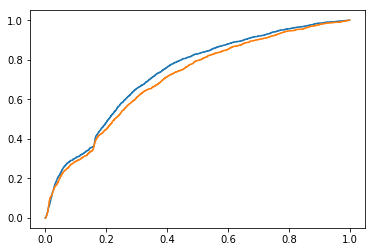

In [26]:
# roc curve
print('ROC curve')
kfold=StratifiedKFold(n_splits=2,random_state=1)
'''pipeline,turtle or list is outermost，inside must be turtle'''
pipe_lr=Pipeline([('scl',StandardScaler()),('pca',PCA(n_components=1)),('clf',LogisticRegression(random_state=1))])
for i, (train,test) in enumerate(kfold.split(X_train,y_train)): 
    prob=pipe_lr.fit(X_train.iloc[train],y_train.iloc[train]).predict_proba(X_train.iloc[test])
    fpr,tqr,thresholds=roc_curve(y_train.iloc[test],prob[:,1],pos_label=1)
    roc_auc=auc(fpr,tqr)
    plt.plot(fpr,tqr,label='ROC fold:{},auc:{}'.format(i,roc_auc))